# Báo cáo Project
Lớp TTNT-156727, Nhóm 15

## 1. Thông tin chung

### Thành viên
- Phạm Mạnh Quyết   20225663
- Đặng Hải Anh      20225688
- Vũ Ngọc Đức       20225816
- Lê Thị Quỳnh      20225917

### Lịch thực hiện
- W25: Đăng ký nhóm 
- W26: Đề xuất project (1/3)
- W31: Báo cáo tiến độ giữa kỳ (5/4)
- W37: Hoàn thành và gửi báo cáo project (17/5)
- W38-40: Trình bày project, Q&A

## 2. Đề xuất project (W26)

### Bài toán
Giải mê cung bằng một số thuật toán tìm kiếm.

Mục tiêu: Tìm được đường đi từ ô bắt đầu đến ô kết thúc được thiết lập. Trong phạm vi nghiên cứu, sẽ luôn đảm bảo có đường đi.

### Phương pháp

Các đề xuất hiện tại
- Depth First Search
- Breadth First Search
- A Star
- Dijkstra

### Phân công
| Công việc | Thành viên đảm nhiệm  |
|-----------------|-----------------|
| Generating Maze    | PM Quyết, ĐH Anh, VN Đức, LT Quỳnh  | 
| Programing DFS, A Star    | PM Quyết, ĐH Anh   | 
| Programing BFS, Dijkstra   | VN Đức, LT Quỳnh    |
| Project Proposal   | PM Quyết    | 
| Report    | ĐH Anh, VN Đức    | 
| Slide   | LT Quỳnh    |  

## 3. Cập nhật kết quả cuối kỳ (W37)

### Chi tiết phương pháp, thuật toán

#### a. Depth First Search
- Mô tả:

  Thuật toán DFS sử dụng **fringe** là một cấu trúc kiểu **stack**  LIFO. Chiến lược mở rộng trong DFS là luôn chọn node nằm trên cùng của stack (node được thêm vào gần nhất). Điều này dẫn đến việc thuật toán ưu tiên mở rộng theo chiều sâu của cây tìm kiếm, đi sâu vào một nhánh cho đến khi không còn node con nào có thể mở rộng nữa, sau đó mới quay lại nhánh trước đó.
  
  Do bài toán là một mê cung đã được biết hoàn toàn, tất cả các ô trong mê cung đều có thể quan sát được hoàn toàn. Vì vậy chúng lưu trữ tất cả các node đã được thăm trong một danh sách **visited** để tránh việc thuật toán quay lại thăm các node đã đi qua, giúp tránh vòng lặp vô hạn và cải thiện hiệu suất.

- Hạn chế:
  - Không đảm bảo tìm đường ngắn nhất.
  - Hiệu suất kém trong mê cung lớn, đi rất sâu vào một nhánh trước khi nhận ra là ngõ cụt, dẫn đến việc đi nhiều nhánh không cần thiết.

#### b. Breadth First Search
- Mô tả:

  Tương tự như DFS nhưng sử dụng **queue** thay vì dùng **stack**. Chiến lược mở rộng của BFS là chọn node nằm ở đầu queue và các node được thăm sẽ thêm vào cuối queue. 

- Hạn chế:
  - Tốn bộ nhớ.
  - Hiệu suất kém với mê cung phức tạp.


#### c. A Star
- Mô tả:
  
  Thuật toán A* dùng **PriorityQueue** với chi phí f_score (g_score + heuristic Manhattan), tìm đường ngắn nhất trong mê cung. Lưu ô đã thăm trong searchPath.
- Hạn chế:
  - Heuristic Manhattan không hiệu quả với mê cung có nhiều tường, dẫn đến duyệt thừa ô.
  - PriorityQueue tiêu tốn tài nguyên với mê cung lớn.
  

#### d. Dijkstra
- Mô tả:

  Thuật toán Dijkstra chọn ô có chi phí thấp nhất từ tập **unvisited**, đảm bảo đường đi ngắn nhất từ điểm bắt đầu đến mục tiêu trong mê cung. Lưu ô đã thăm trong **visited**.
- Hạn chế:
  - Tốn bộ nhớ và thời gian cho mê cung lớn do duyệt toàn bộ ô.
  

### Kết quả
Biểu đồ biểu diễn trung bình kết quả về node, path và time của 4 thuật toán DFS, BFS, Wall Follower, Recursive Backtracking.

Kết quả sau 100 lần chạy thử nghiệm trên các maze 50x50 được tạo ngẫu nhiên, điểm mở đầu và kết thúc ngẫu nhiên.

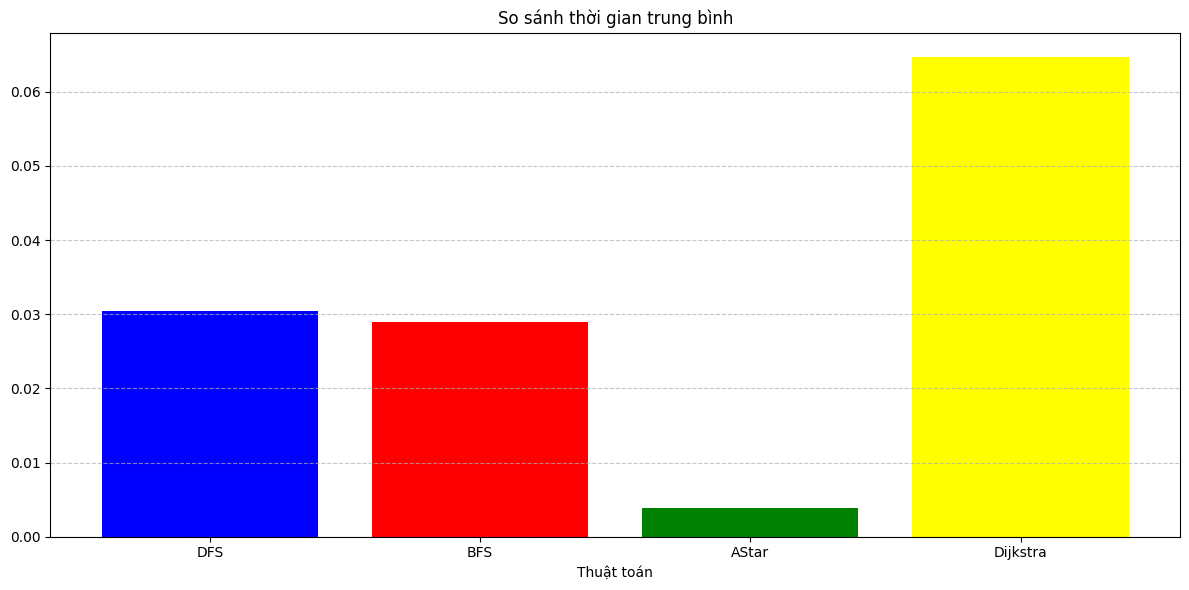

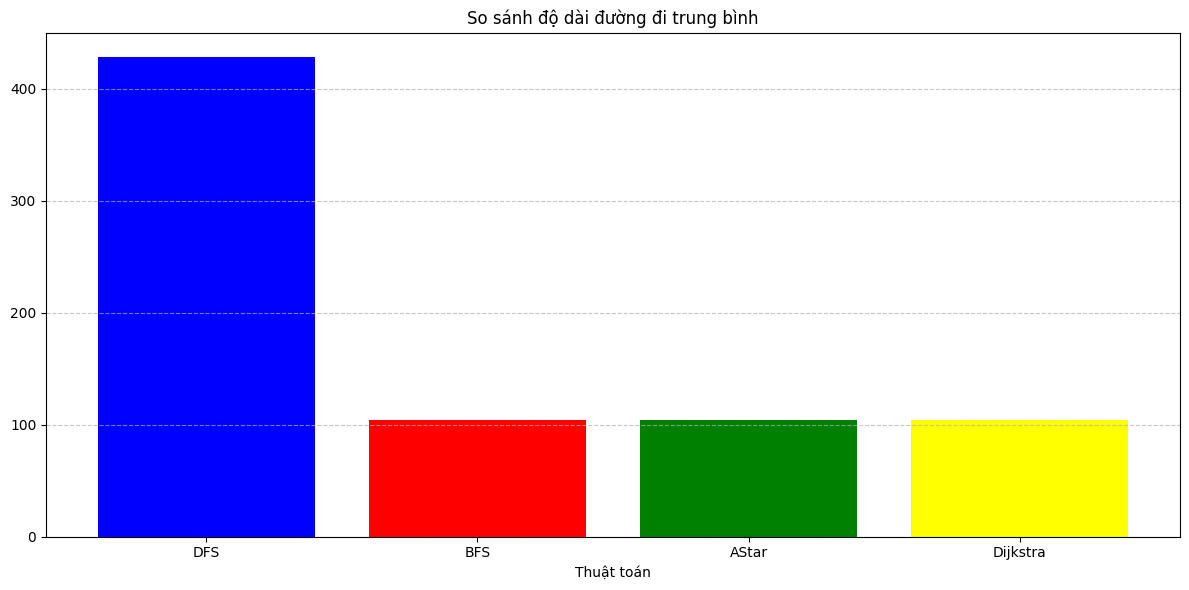

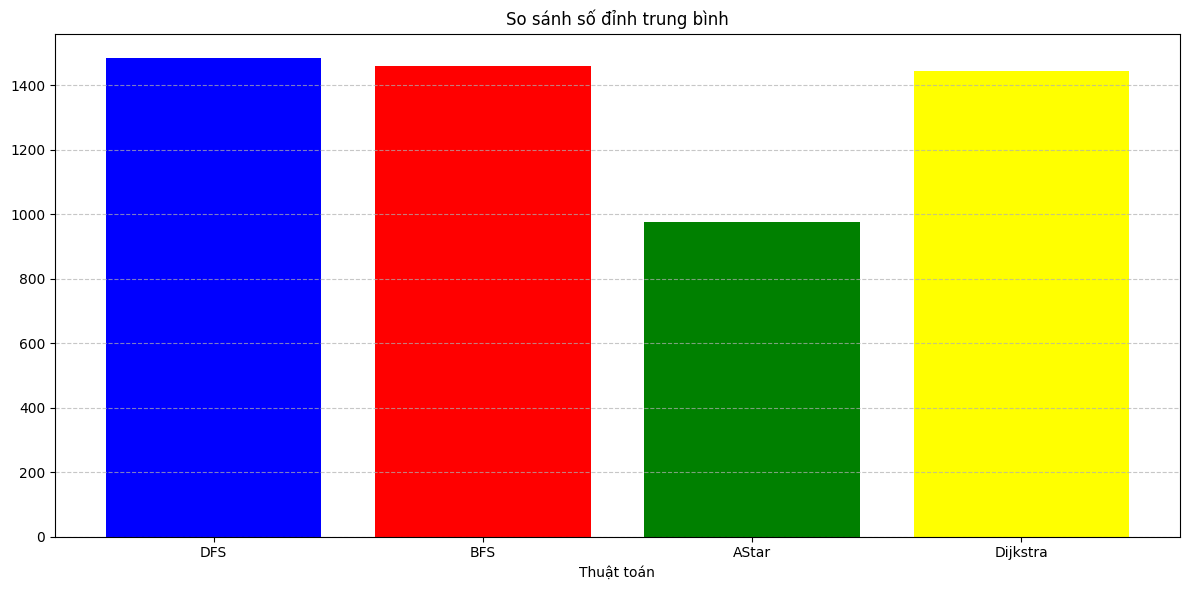

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

node_df = pd.read_csv('./data/node.csv')
time_df = pd.read_csv('./data/time.csv')
path_df = pd.read_csv('./data/path.csv')

def draw_bar_chart(df, title):
    algorithms = ["DFS", "BFS", "AStar", "Dijkstra"]
    means = []
    
    for algorithm in algorithms:
        if algorithm in df.columns:
            mean = df[algorithm].mean()
            means.append(mean)
        else:
            means.append(0) 
    
    plt.figure(figsize=(12, 6))
    plt.bar(algorithms, means, color=['blue', 'red', 'green', 'yellow'])
    plt.title(title)
    plt.xlabel('Thuật toán')
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

draw_bar_chart(time_df, 'So sánh thời gian trung bình')
draw_bar_chart(path_df, 'So sánh độ dài đường đi trung bình')
draw_bar_chart(node_df, 'So sánh số đỉnh trung bình')